## Generate Static Graphs

These are the input parameters for the notebook. They will be automatically changed when the scripts to generate monthly statistics are run. You can modify them manually to generate multiple plots locally as well.

Pass in `None` to remove the filters and plot all data. This is not recommended for production settings, but might be useful for reports based on data snapshots.

In [1]:
year = 2020
month = 11
program = "default"
study_type = "program"
mode_of_interest = "e-bike"

In [2]:
from collections import defaultdict
import datetime

import numpy as np
import pandas as pd

from plots import *
import scaffolding

sns.set_style("whitegrid")
sns.set()
%matplotlib inline

URL not formatted, defaulting to "Stage_database"
Connecting to database URL db


In [3]:
# Do not run this notebook at all unless it is for a program; nbclient will run up through this cell
if study_type != "program":
    raise Exception("The plots in this notebook are only relevant to programs")

In [4]:
# Loading mapping dictionaries from mapping_dictionaries notebook
%store -r dic_re
%store -r dic_pur

# convert a dictionary to a defaultdict
dic_re = defaultdict(lambda: 'Other',dic_re)
dic_pur = defaultdict(lambda: 'Other',dic_pur)

## Collect Data From Database

In [5]:
expanded_ct, file_suffix, quality_text, debug_df = scaffolding.load_viz_notebook_data(year,
                                                                            month,
                                                                            program,
                                                                            study_type,
                                                                            dic_re,
                                                                            dic_pur=dic_pur)

0      4c_AGgrHoywg5gYmyL8
1      4c_Ri332Xj3DKaCrdwl
2      4c_6gzfgbVUODrbTdc_
3      4c_eJEIg2mWQYU3ISXU
4      4c_s7jHZr7a0yQOAa1b
              ...         
252      prepilot_rhBZukxY
253      prepilot_k36cxmfA
254      prepilot_FmxVf8u6
255      prepilot_pNpK4pFg
256      prepilot_F3jxHLSW
Name: user_email, Length: 257, dtype: object

Loaded all confirmed trips of length 987


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.604535e+09,2020-11-04T16:12:58-08:00,"{'type': 'Point', 'coordinates': [-122.0864386...",5fa51fd83f4e2785a20c6bd3,1.604534e+09,2020-11-04T15:57:08-08:00,"{'type': 'Point', 'coordinates': [-122.1041867...",950.000000,5507.163032,...,11,4,16,12,58,2,America/Los_Angeles,611fdd9d1c25a2c3dbf7cf08,87cb8852-9b61-4c0e-91ec-07a33145659b,1.629478e+09
1,DwellSegmentationTimeFilter,1.604853e+09,2020-11-08T08:34:22-08:00,"{'type': 'Point', 'coordinates': [-122.0836263...",5fa8254cbbfc999b09f5bade,1.604853e+09,2020-11-08T08:28:23.241996-08:00,"{'type': 'Point', 'coordinates': [-122.0864386...",358.758004,408.052791,...,11,8,8,34,22,6,America/Los_Angeles,611fdd9d1c25a2c3dbf7cf09,87cb8852-9b61-4c0e-91ec-07a33145659b,1.629478e+09
2,DwellSegmentationTimeFilter,1.604854e+09,2020-11-08T08:52:28-08:00,"{'type': 'Point', 'coordinates': [-122.0831892...",5fa8335d1ef669f1460b594b,1.604854e+09,2020-11-08T08:47:59.903717-08:00,"{'type': 'Point', 'coordinates': [-122.0836263...",268.096283,403.285598,...,11,8,8,52,28,6,America/Los_Angeles,611fdd9d1c25a2c3dbf7cf0a,87cb8852-9b61-4c0e-91ec-07a33145659b,1.629478e+09
3,DwellSegmentationTimeFilter,1.604856e+09,2020-11-08T09:12:43-08:00,"{'type': 'Point', 'coordinates': [-122.0864468...",5fa8335d1ef669f1460b594d,1.604855e+09,2020-11-08T09:06:10.614349-08:00,"{'type': 'Point', 'coordinates': [-122.0831892...",392.385651,396.974322,...,11,8,9,12,43,6,America/Los_Angeles,611fdd9d1c25a2c3dbf7cf0b,87cb8852-9b61-4c0e-91ec-07a33145659b,1.629478e+09
4,DwellSegmentationTimeFilter,1.605049e+09,2020-11-10T14:48:22-08:00,"{'type': 'Point', 'coordinates': [-122.1103719...",5fab1cb139b8009bcaa64934,1.605048e+09,2020-11-10T14:45:04-08:00,"{'type': 'Point', 'coordinates': [-122.1091189...",198.000000,234.237212,...,11,10,14,48,22,1,America/Los_Angeles,611fdd9d1c25a2c3dbf7cf0c,87cb8852-9b61-4c0e-91ec-07a33145659b,1.629478e+09


After filtering, found 987 participant trips 


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.604535e+09,2020-11-04T16:12:58-08:00,"{'type': 'Point', 'coordinates': [-122.0864386...",5fa51fd83f4e2785a20c6bd3,1.604534e+09,2020-11-04T15:57:08-08:00,"{'type': 'Point', 'coordinates': [-122.1041867...",950.000000,5507.163032,...,11,4,16,12,58,2,America/Los_Angeles,611fdd9d1c25a2c3dbf7cf08,87cb8852-9b61-4c0e-91ec-07a33145659b,1.629478e+09
1,DwellSegmentationTimeFilter,1.604853e+09,2020-11-08T08:34:22-08:00,"{'type': 'Point', 'coordinates': [-122.0836263...",5fa8254cbbfc999b09f5bade,1.604853e+09,2020-11-08T08:28:23.241996-08:00,"{'type': 'Point', 'coordinates': [-122.0864386...",358.758004,408.052791,...,11,8,8,34,22,6,America/Los_Angeles,611fdd9d1c25a2c3dbf7cf09,87cb8852-9b61-4c0e-91ec-07a33145659b,1.629478e+09
2,DwellSegmentationTimeFilter,1.604854e+09,2020-11-08T08:52:28-08:00,"{'type': 'Point', 'coordinates': [-122.0831892...",5fa8335d1ef669f1460b594b,1.604854e+09,2020-11-08T08:47:59.903717-08:00,"{'type': 'Point', 'coordinates': [-122.0836263...",268.096283,403.285598,...,11,8,8,52,28,6,America/Los_Angeles,611fdd9d1c25a2c3dbf7cf0a,87cb8852-9b61-4c0e-91ec-07a33145659b,1.629478e+09
3,DwellSegmentationTimeFilter,1.604856e+09,2020-11-08T09:12:43-08:00,"{'type': 'Point', 'coordinates': [-122.0864468...",5fa8335d1ef669f1460b594d,1.604855e+09,2020-11-08T09:06:10.614349-08:00,"{'type': 'Point', 'coordinates': [-122.0831892...",392.385651,396.974322,...,11,8,9,12,43,6,America/Los_Angeles,611fdd9d1c25a2c3dbf7cf0b,87cb8852-9b61-4c0e-91ec-07a33145659b,1.629478e+09
4,DwellSegmentationTimeFilter,1.605049e+09,2020-11-10T14:48:22-08:00,"{'type': 'Point', 'coordinates': [-122.1103719...",5fab1cb139b8009bcaa64934,1.605048e+09,2020-11-10T14:45:04-08:00,"{'type': 'Point', 'coordinates': [-122.1091189...",198.000000,234.237212,...,11,10,14,48,22,1,America/Los_Angeles,611fdd9d1c25a2c3dbf7cf0c,87cb8852-9b61-4c0e-91ec-07a33145659b,1.629478e+09


After filtering, found 548 labeled trips


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
34,DwellSegmentationTimeFilter,1.604364e+09,2020-11-02T17:45:22.115000-07:00,"{'type': 'Point', 'coordinates': [-104.9409405...",5fa139609ae96f3a5fcdef31,1.604364e+09,2020-11-02T17:39:08.049000-07:00,"{'type': 'Point', 'coordinates': [-104.9398732...",374.066000,384.730231,...,11,2,17,45,22,0,America/Denver,600533265e173ffb99e07625,1d292b85-c549-409a-a10d-746e957582a0,1.604402e+09
35,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:12:12-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",5fa4690763a5e0e8d90c7fa4,1.604601e+09,2020-11-05T11:30:56.952000-07:00,"{'type': 'Point', 'coordinates': [-104.9479963...",2475.048000,13765.915676,...,11,5,12,12,12,3,America/Denver,600533265e173ffb99e07626,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
36,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:27:22-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",5fa4690763a5e0e8d90c7fa8,1.604604e+09,2020-11-05T12:22:21.130739-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",300.869261,1508.223413,...,11,5,12,27,22,3,America/Denver,600533265e173ffb99e07627,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
37,DwellSegmentationTimeFilter,1.604606e+09,2020-11-05T12:47:29.017000-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",5fa4690763a5e0e8d90c7faa,1.604605e+09,2020-11-05T12:42:19.793043-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",309.223957,434.038504,...,11,5,12,47,29,3,America/Denver,600533265e173ffb99e07628,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
38,DwellSegmentationTimeFilter,1.604610e+09,2020-11-05T13:54:28.880000-07:00,"{'type': 'Point', 'coordinates': [-105.0824703...",5fa4771a533f6ebf89c7c5e3,1.604610e+09,2020-11-05T13:52:57.667396-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",91.212605,333.230154,...,11,5,13,54,28,3,America/Denver,600533265e173ffb99e07629,1d292b85-c549-409a-a10d-746e957582a0,1.604614e+09


,mode_confirm,purpose_confirm,replaced_mode
34,walk,meal,same_mode
35,train,personal_med,same_mode
36,skateboard,transit_transfer,bus
37,not_a_trip,transit_transfer,same_mode
38,not_a_trip,transit_transfer,same_mode


Found Index(['mode_confirm', 'purpose_confirm', 'replaced_mode'], dtype='object') columns of length 3
After expanding, columns went from 38 -> 41


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts,mode_confirm,purpose_confirm,replaced_mode
34,DwellSegmentationTimeFilter,1.604364e+09,2020-11-02T17:45:22.115000-07:00,"{'type': 'Point', 'coordinates': [-104.9409405...",5fa139609ae96f3a5fcdef31,1.604364e+09,2020-11-02T17:39:08.049000-07:00,"{'type': 'Point', 'coordinates': [-104.9398732...",374.066000,384.730231,...,45,22,0,America/Denver,600533265e173ffb99e07625,1d292b85-c549-409a-a10d-746e957582a0,1.604402e+09,walk,meal,same_mode
35,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:12:12-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",5fa4690763a5e0e8d90c7fa4,1.604601e+09,2020-11-05T11:30:56.952000-07:00,"{'type': 'Point', 'coordinates': [-104.9479963...",2475.048000,13765.915676,...,12,12,3,America/Denver,600533265e173ffb99e07626,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09,train,personal_med,same_mode
36,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:27:22-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",5fa4690763a5e0e8d90c7fa8,1.604604e+09,2020-11-05T12:22:21.130739-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",300.869261,1508.223413,...,27,22,3,America/Denver,600533265e173ffb99e07627,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09,skateboard,transit_transfer,bus
37,DwellSegmentationTimeFilter,1.604606e+09,2020-11-05T12:47:29.017000-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",5fa4690763a5e0e8d90c7faa,1.604605e+09,2020-11-05T12:42:19.793043-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",309.223957,434.038504,...,47,29,3,America/Denver,600533265e173ffb99e07628,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09,not_a_trip,transit_transfer,same_mode
38,DwellSegmentationTimeFilter,1.604610e+09,2020-11-05T13:54:28.880000-07:00,"{'type': 'Point', 'coordinates': [-105.0824703...",5fa4771a533f6ebf89c7c5e3,1.604610e+09,2020-11-05T13:52:57.667396-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",91.212605,333.230154,...,54,28,3,America/Denver,600533265e173ffb99e07629,1d292b85-c549-409a-a10d-746e957582a0,1.604614e+09,not_a_trip,transit_transfer,same_mode


_2020_11_default
Based on 519 confirmed trips from 12 users
of 987 total  trips from 13 users (52.58%)


0      4c_AGgrHoywg5gYmyL8
1      4c_Ri332Xj3DKaCrdwl
2      4c_6gzfgbVUODrbTdc_
3      4c_eJEIg2mWQYU3ISXU
4      4c_s7jHZr7a0yQOAa1b
              ...         
252      prepilot_rhBZukxY
253      prepilot_k36cxmfA
254      prepilot_FmxVf8u6
255      prepilot_pNpK4pFg
256      prepilot_F3jxHLSW
Name: user_email, Length: 257, dtype: object

In [6]:
if 'mode_confirm' in expanded_ct.columns:
    mode_of_interest_df = expanded_ct.query(f"mode_confirm == '{mode_of_interest}'")
    debug_df.loc[f"{mode_of_interest}_trips"] = len(mode_of_interest_df)
    debug_df.loc[f"{mode_of_interest}_trips_with_replaced_mode"] = scaffolding.trip_label_count("Replaced_mode", mode_of_interest_df)

In [7]:
mode_of_interest_df

,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,_id,user_id,metadata_write_ts,mode_confirm,purpose_confirm,replaced_mode,distance_miles,Mode_confirm,Replaced_mode,Trip_purpose


## Data Preprocessing

In [8]:
# Get timestamp from known year/month/day aggregated to days
sel_cols_no_label_dep = ['user_id','start_local_dt_year','start_local_dt_month','start_local_dt_day','distance_miles']
sel_cols_with_label_dep = sel_cols_no_label_dep + ['mode_confirm']
if len(expanded_ct) == 0:
    data = expanded_ct.copy()
elif "mode_confirm" not in expanded_ct.columns:
    data = expanded_ct[sel_cols_no_label_dep].copy()
else:
    data = expanded_ct[sel_cols_with_label_dep].copy()
    
if len(expanded_ct) > 0:
    data.rename(columns={'start_local_dt_year':'year','start_local_dt_month':'month','start_local_dt_day':'day'}, inplace=True)
    data['date_time'] = pd.to_datetime(data[['year','month','day']])
    data = data.drop(columns=['year','month','day'])

    # Categorical type will include all days/modes in groupby even if there is no data for a particular tabulation
    data.user_id = pd.Categorical(data.user_id)
    data.date_time = pd.Categorical(data.date_time)
    
data.head()

,user_id,distance_miles,mode_confirm,date_time
34,1d292b85-c549-409a-a10d-746e957582a0,0.238533,walk,2020-11-02
35,1d292b85-c549-409a-a10d-746e957582a0,8.534868,train,2020-11-05
36,1d292b85-c549-409a-a10d-746e957582a0,0.935099,skateboard,2020-11-05
37,1d292b85-c549-409a-a10d-746e957582a0,0.269104,not_a_trip,2020-11-05
38,1d292b85-c549-409a-a10d-746e957582a0,0.206603,not_a_trip,2020-11-05


In [9]:
if len(expanded_ct) > 0:
    # Get the count of unique users that were active on each given date
    active_users = pd.DataFrame(data.groupby(['date_time'], as_index=False)['user_id'].nunique())
    active_users.rename(columns={'user_id':'active_users'}, inplace=True)

    if "mode_confirm" in expanded_ct.columns:
        # Count the number of trips for each confirmed mode
        mode_counts = data.groupby(['user_id','date_time','mode_confirm'], as_index=False).size()
        mode_counts.rename(columns={'size':'trip_count'}, inplace=True)

        # Sum daily distance traveled for each mode
        mode_distance = data.groupby(['user_id','date_time','mode_confirm'], as_index=False)[['distance_miles']].sum()
        mode_distance.rename(columns={'sum':'distance_miles'}, inplace=True)
        mode_distance['distance_miles'] = mode_distance['distance_miles'].fillna(0)

        # Add 7-day rolling avg smoothing to better see trends
        mode_counts['trip_count_smooth'] = mode_counts.groupby(['user_id','mode_confirm'])['trip_count'].apply(lambda x: x.rolling(7,1).mean())
        mode_distance['distance_miles_smooth'] = mode_distance.groupby(['user_id','mode_confirm'])['distance_miles'].apply(lambda x: x.rolling(7,1).mean())
        
        # This is the mode specific part
        mode_counts_interest = mode_counts[mode_counts['mode_confirm']==mode_of_interest].copy()
        mode_distance_interest = mode_distance[mode_distance['mode_confirm']==mode_of_interest].copy()
        
        # Mapping new mode labels with dictionaries
        mode_counts['Mode_confirm'] = mode_counts['mode_confirm'].map(dic_re)
        mode_counts_interest['Mode_confirm'] = mode_counts_interest['mode_confirm'].map(dic_re)
        mode_distance_interest['Mode_confirm'] = mode_distance_interest['mode_confirm'].map(dic_re)

## Generate Timeseries Plots

### Daily trips for mode of interest

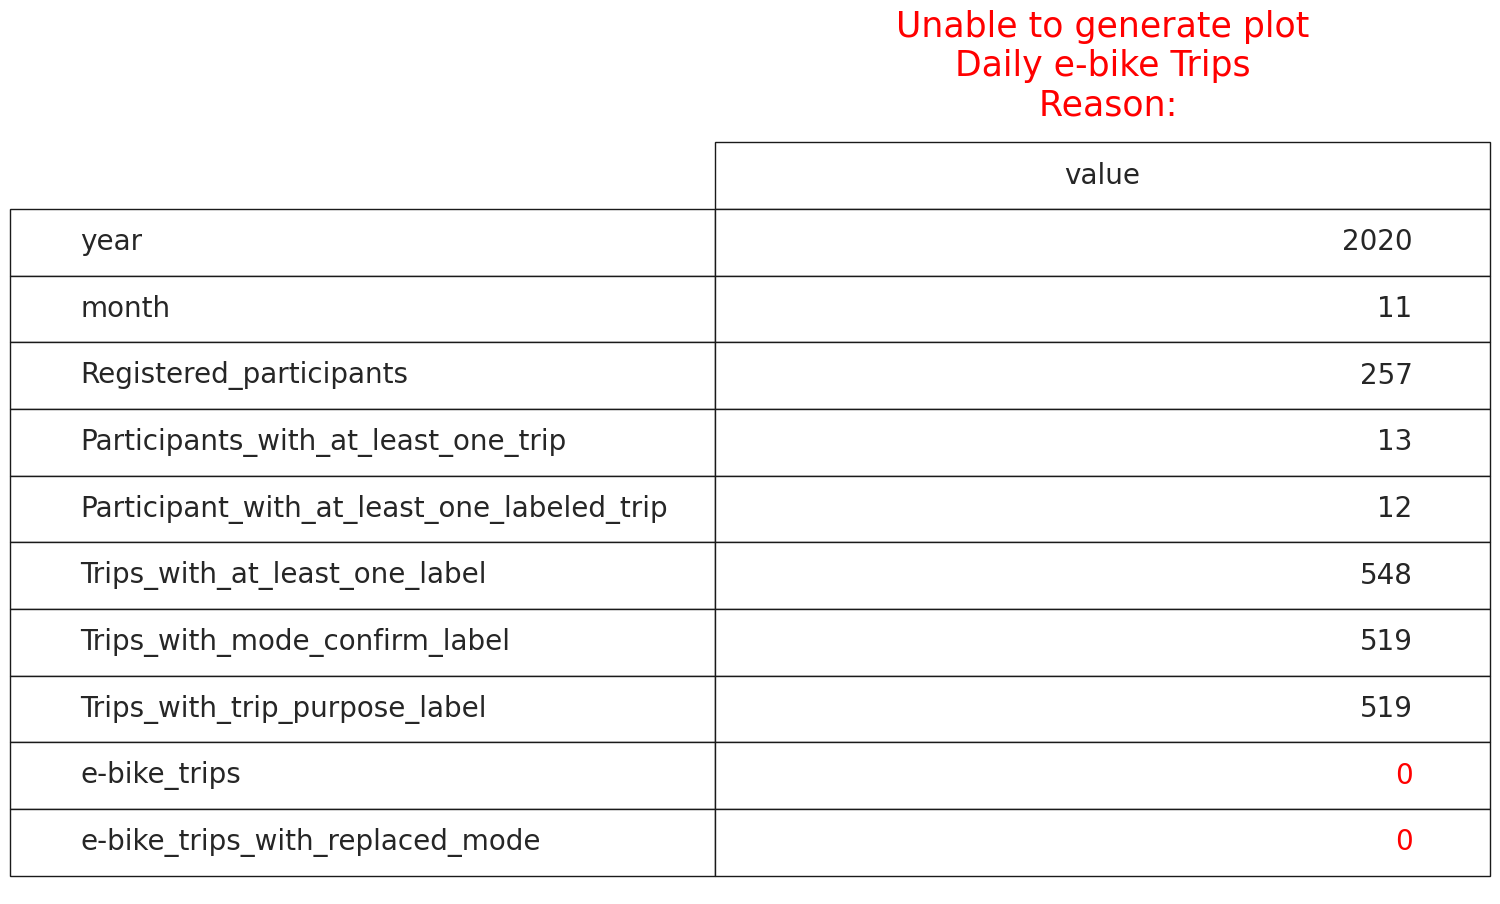

In [10]:
# Plot of total ebikeshare trips across all users
plot_title_no_quality = f'Daily {mode_of_interest} Trips'
file_name = f"ts_{mode_of_interest}_share%s"%file_suffix

try:
    if len(mode_counts_interest) == 0:
        # force error generation so that we will go into the "missing" data code path
        raise RuntimeError(f"No {mode_of_interest} trips found")
    plot_data = mode_counts_interest.groupby(['date_time'])['trip_count_smooth'].agg(['sum']).reset_index()
    
    plot_title= plot_title_no_quality+"\n"+quality_text
    ylab = 'Trip Count'

    timeseries_plot(plot_data['date_time'], plot_data['sum'], plot_title, ylab, file_name)
    alt_text = store_alt_text_timeseries(plot_data, file_name, plot_title)
except:
    generate_missing_plot(plot_title_no_quality,debug_df,file_name)
    alt_text = store_alt_text_missing(debug_df, file_name, plot_title_no_quality)

### Daily mileage for mode of interest

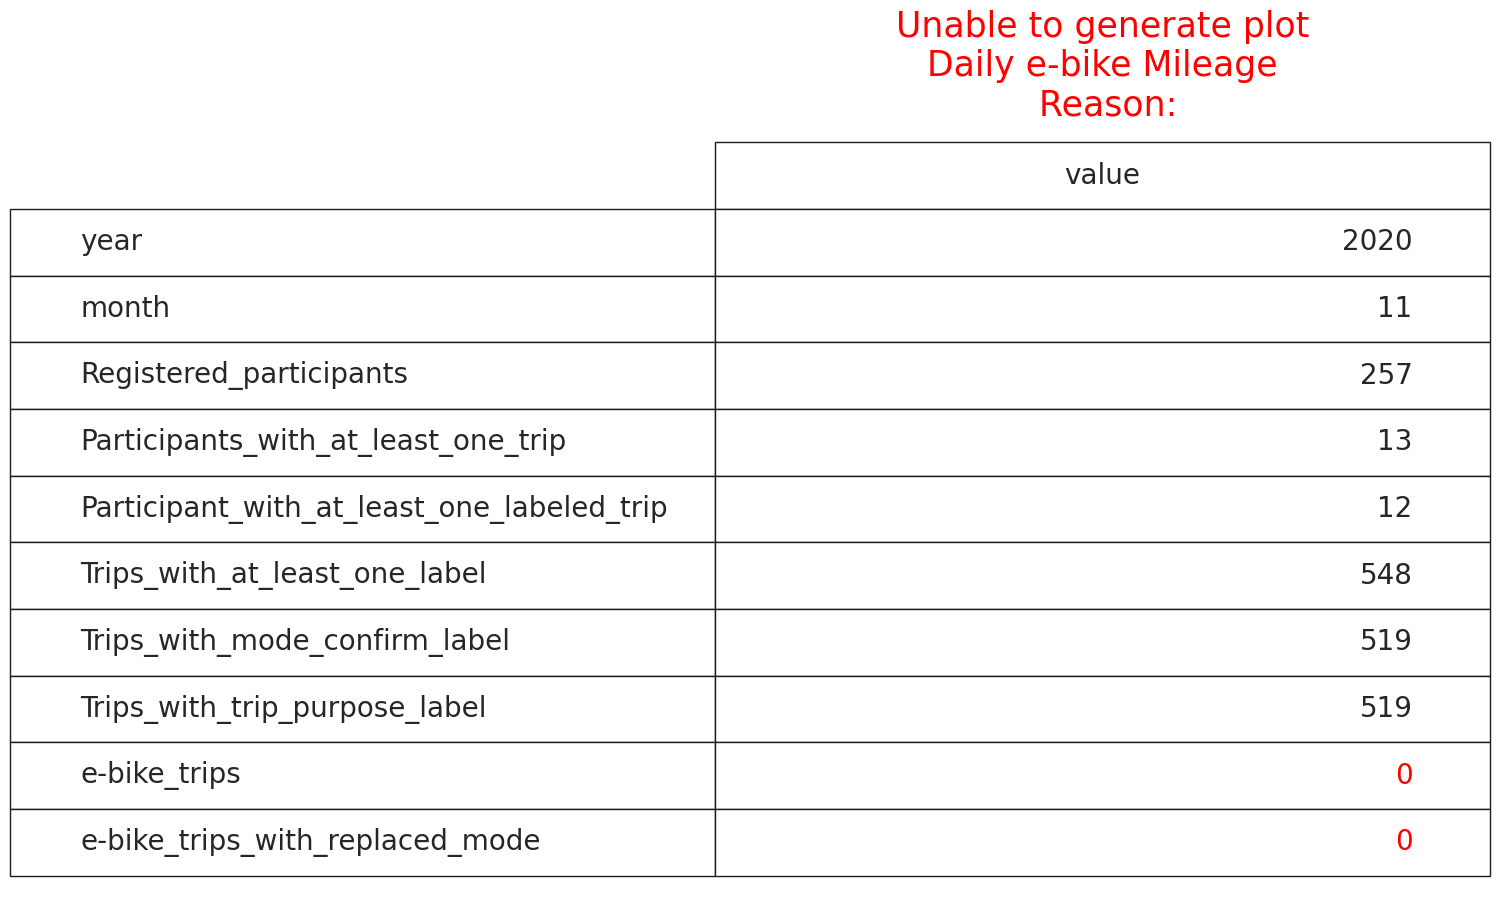

In [11]:
# Plot of total ebikeshare mileage across all users
plot_title_no_quality = f'Daily {mode_of_interest} Mileage'
file_name = f"ts_{mode_of_interest}_miles%s"%file_suffix

try:
    if len(mode_counts_interest) == 0:
        # force error generation so that we will go into the "missing" data code path
        raise RuntimeError(f"No {mode_of_interest} trips found")

    plot_data = mode_distance_interest.groupby(['date_time'])['distance_miles'].agg(['sum']).reset_index()

    plot_title= plot_title_no_quality+"\n"+quality_text
    ylab = 'Miles'

    timeseries_plot(plot_data['date_time'], plot_data['sum'], plot_title, ylab, file_name)
    alt_text = store_alt_text_timeseries(plot_data, file_name, plot_title)
except:
    generate_missing_plot(plot_title_no_quality,debug_df,file_name)
    alt_text = store_alt_text_missing(debug_df, file_name, plot_title_no_quality)

### Daily mileage per user for mode of interest

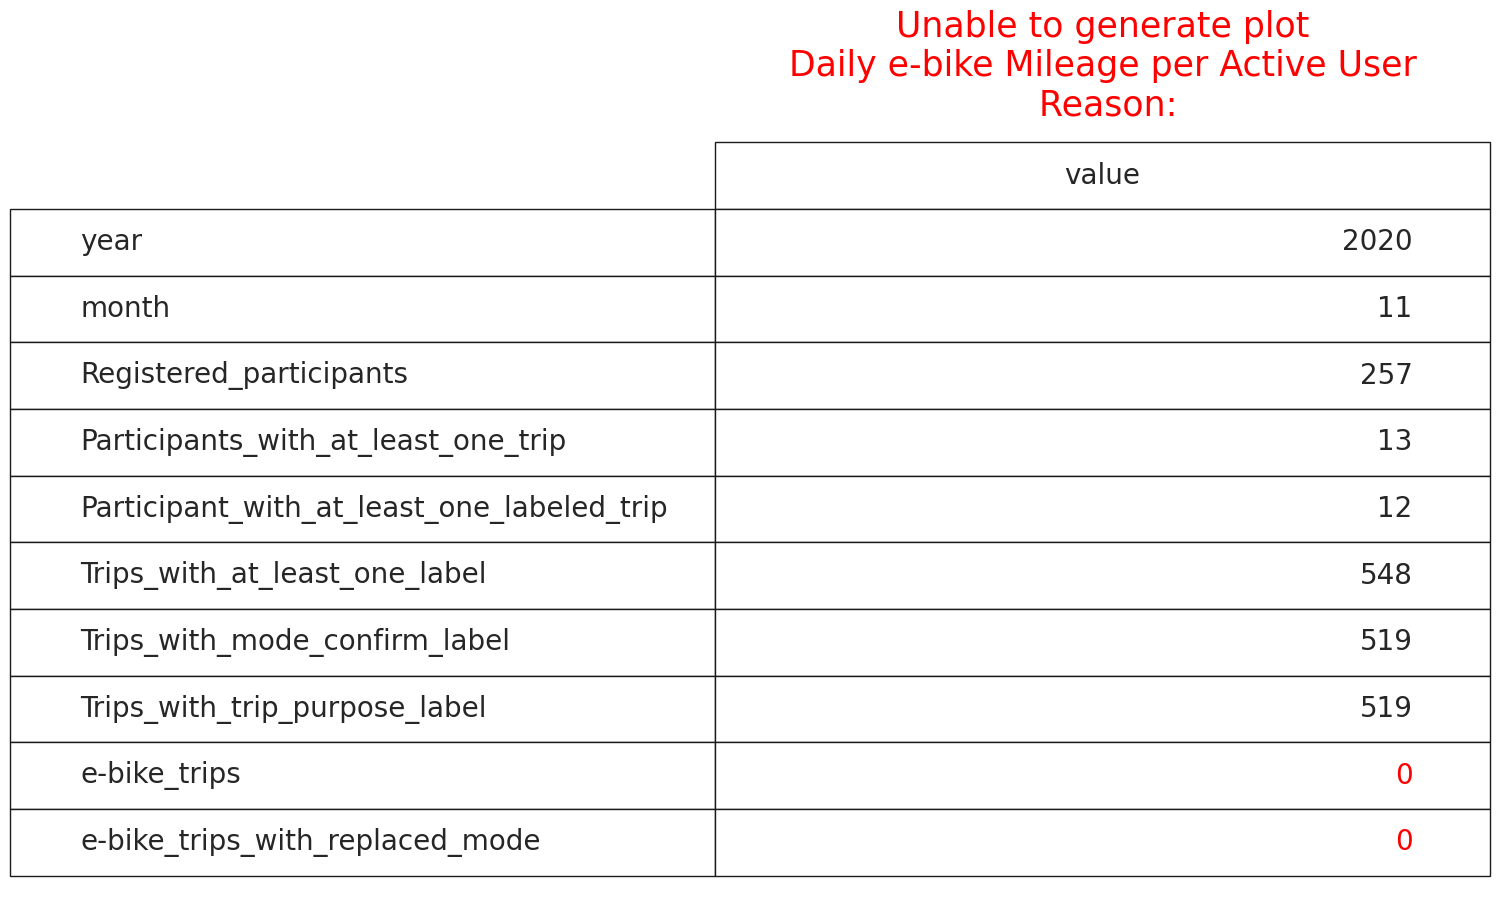

In [12]:
# Plot of total ebikeshare mileage normalized by number of users
plot_title_no_quality = f'Daily {mode_of_interest} Mileage per Active User'
file_name = f"ts_{mode_of_interest}_miles_user%s"%file_suffix

try:
    if len(mode_counts_interest) == 0:
        # force error generation so that we will go into the "missing" data code path
        raise RuntimeError(f"No {mode_of_interest} trips found")

    plot_data = mode_distance_interest.groupby(['date_time'])['distance_miles'].agg(['sum']).reset_index()
    plot_data = plot_data.merge(active_users, on='date_time')
    plot_data['mileage_per_user'] = plot_data['sum'] / plot_data['active_users']

    plot_title= plot_title_no_quality+"\n"+quality_text
    ylab = 'miles/user'

    timeseries_plot(plot_data['date_time'], plot_data['mileage_per_user'], plot_title, ylab, file_name)
    alt_text = store_alt_text_timeseries(plot_data, file_name, plot_title)
except:
    generate_missing_plot(plot_title_no_quality,debug_df,file_name)
    alt_text = store_alt_text_missing(debug_df, file_name, plot_title_no_quality)

### Proportion of total daily mileage for mode of interest

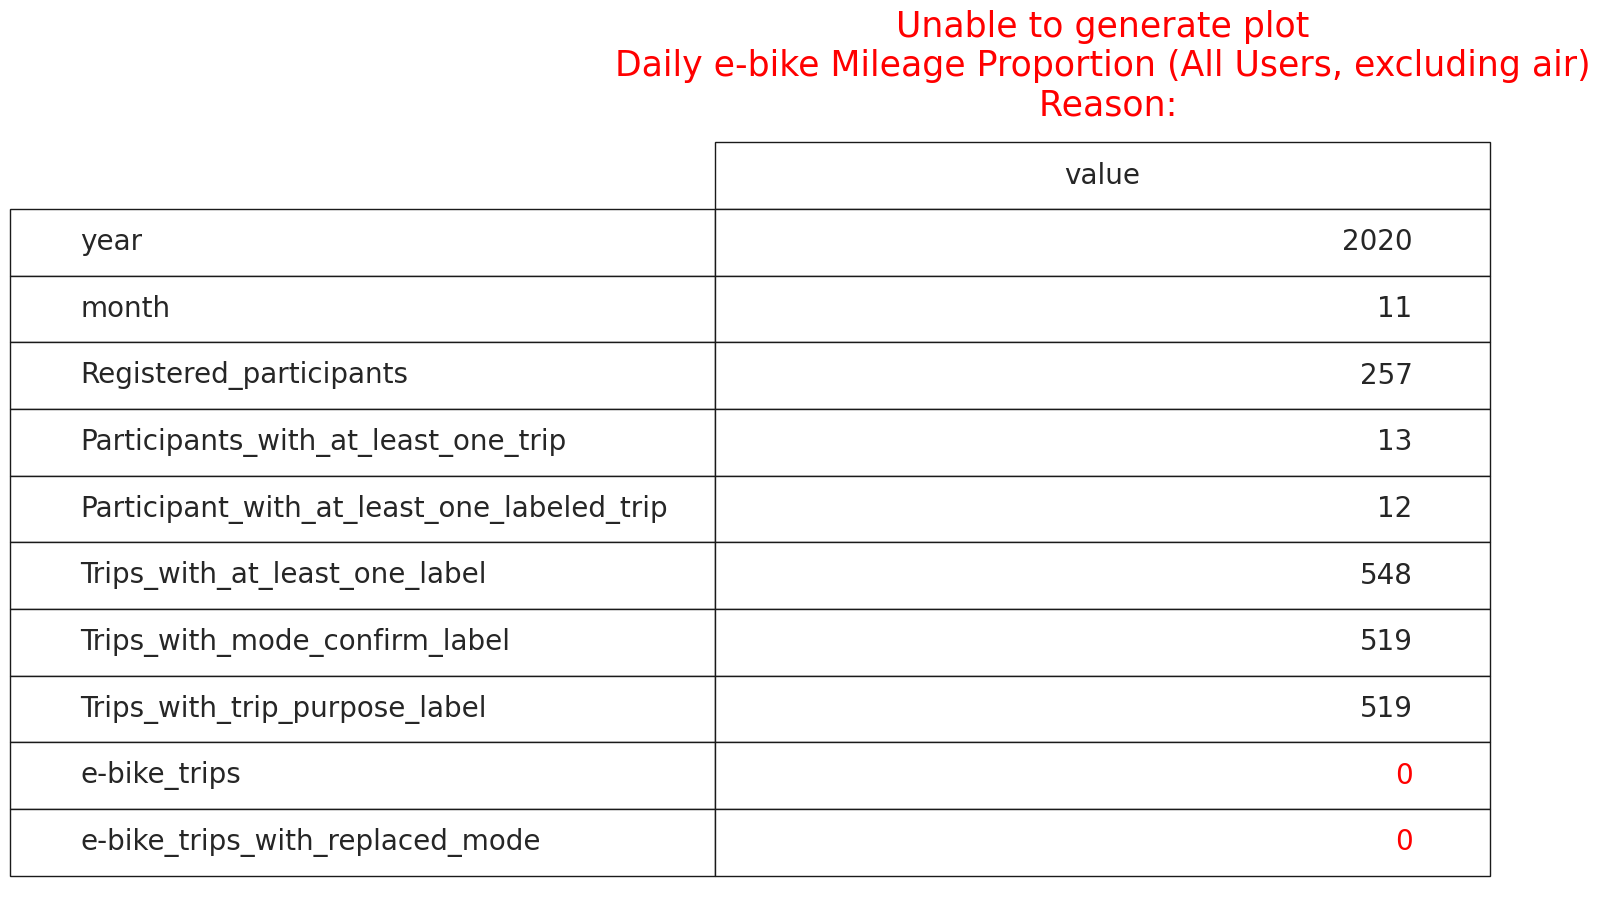

In [13]:
# Plot of ebike mileage share proportion across all users
plot_title_no_quality = f'Daily {mode_of_interest} Mileage Proportion (All Users, excluding air)'
file_name = f"ts_{mode_of_interest}_miles_proportion%s"%file_suffix

try:
    if len(mode_counts_interest) == 0:
        # force error generation so that we will go into the "missing" data code path
        raise RuntimeError(f"No {mode_of_interest} trips found")

    plot_data = mode_distance_interest.groupby(['date_time'], as_index=False)['distance_miles_smooth'].sum()
    total_miles = mode_distance.groupby(['date_time'], as_index=False)['distance_miles_smooth'].sum()
    plot_data = plot_data.merge(total_miles, on=['date_time'])
    plot_data['miles_proportion'] = plot_data['distance_miles_smooth_x'] / plot_data['distance_miles_smooth_y']

    plot_title= plot_title_no_quality+"\n"+quality_text
    ylab = 'Proportion of Daily Miles'

    timeseries_plot(plot_data['date_time'], plot_data['miles_proportion'], plot_title, ylab, file_name)
    alt_text = store_alt_text_timeseries(plot_data, file_name, plot_title)
except:
    generate_missing_plot(plot_title_no_quality,debug_df,file_name)
    alt_text = store_alt_text_missing(debug_df, file_name, plot_title_no_quality)

### Proportion of total daily trips for mode of interest

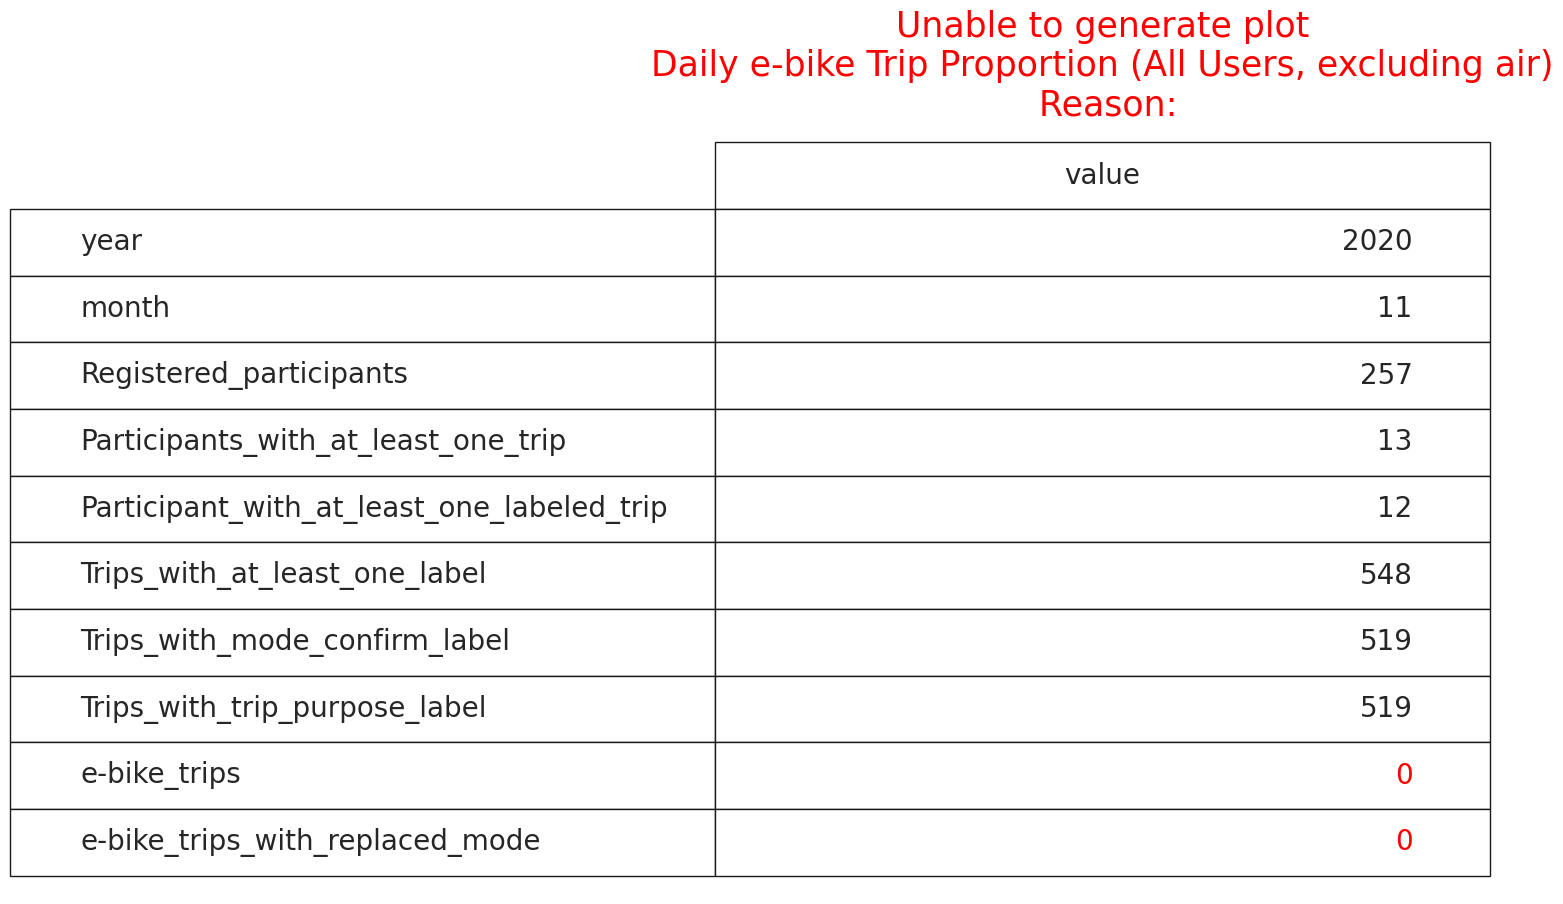

In [14]:
# Plot of ebike trip share proportion across all users
plot_title_no_quality = f'Daily {mode_of_interest} Trip Proportion (All Users, excluding air)'
file_name = f"ts_{mode_of_interest}_trips_proportion%s"%file_suffix

try:
    if len(mode_counts_interest) == 0:
        # force error generation so that we will go into the "missing" data code path
        raise RuntimeError(f"No {mode_of_interest} trips found")

    plot_data = mode_counts.groupby(['date_time','mode_confirm'], as_index=False)['trip_count_smooth'].sum()
    total_trips = plot_data.groupby(['date_time'], as_index=False).sum()
    plot_data = plot_data.merge(total_trips, on='date_time')
    plot_data['trip_proportion'] = plot_data['trip_count_smooth_x'] / plot_data['trip_count_smooth_y']
    plot_data = plot_data[plot_data['mode_confirm']==mode_of_interest]

    plot_title= plot_title_no_quality+"\n"+quality_text
    ylab = 'Proportion of Daily Trips'

    timeseries_plot(plot_data['date_time'], plot_data['trip_proportion'], plot_title, ylab, file_name)
    alt_text = store_alt_text_timeseries(plot_data.drop(columns=['mode_confirm','trip_count_smooth_x','trip_count_smooth_y']), file_name, plot_title)
except:
    generate_missing_plot(plot_title_no_quality,debug_df,file_name)
    alt_text = store_alt_text_missing(debug_df, file_name, plot_title_no_quality)

### Daily trip proportion for mode of interest with error bounds

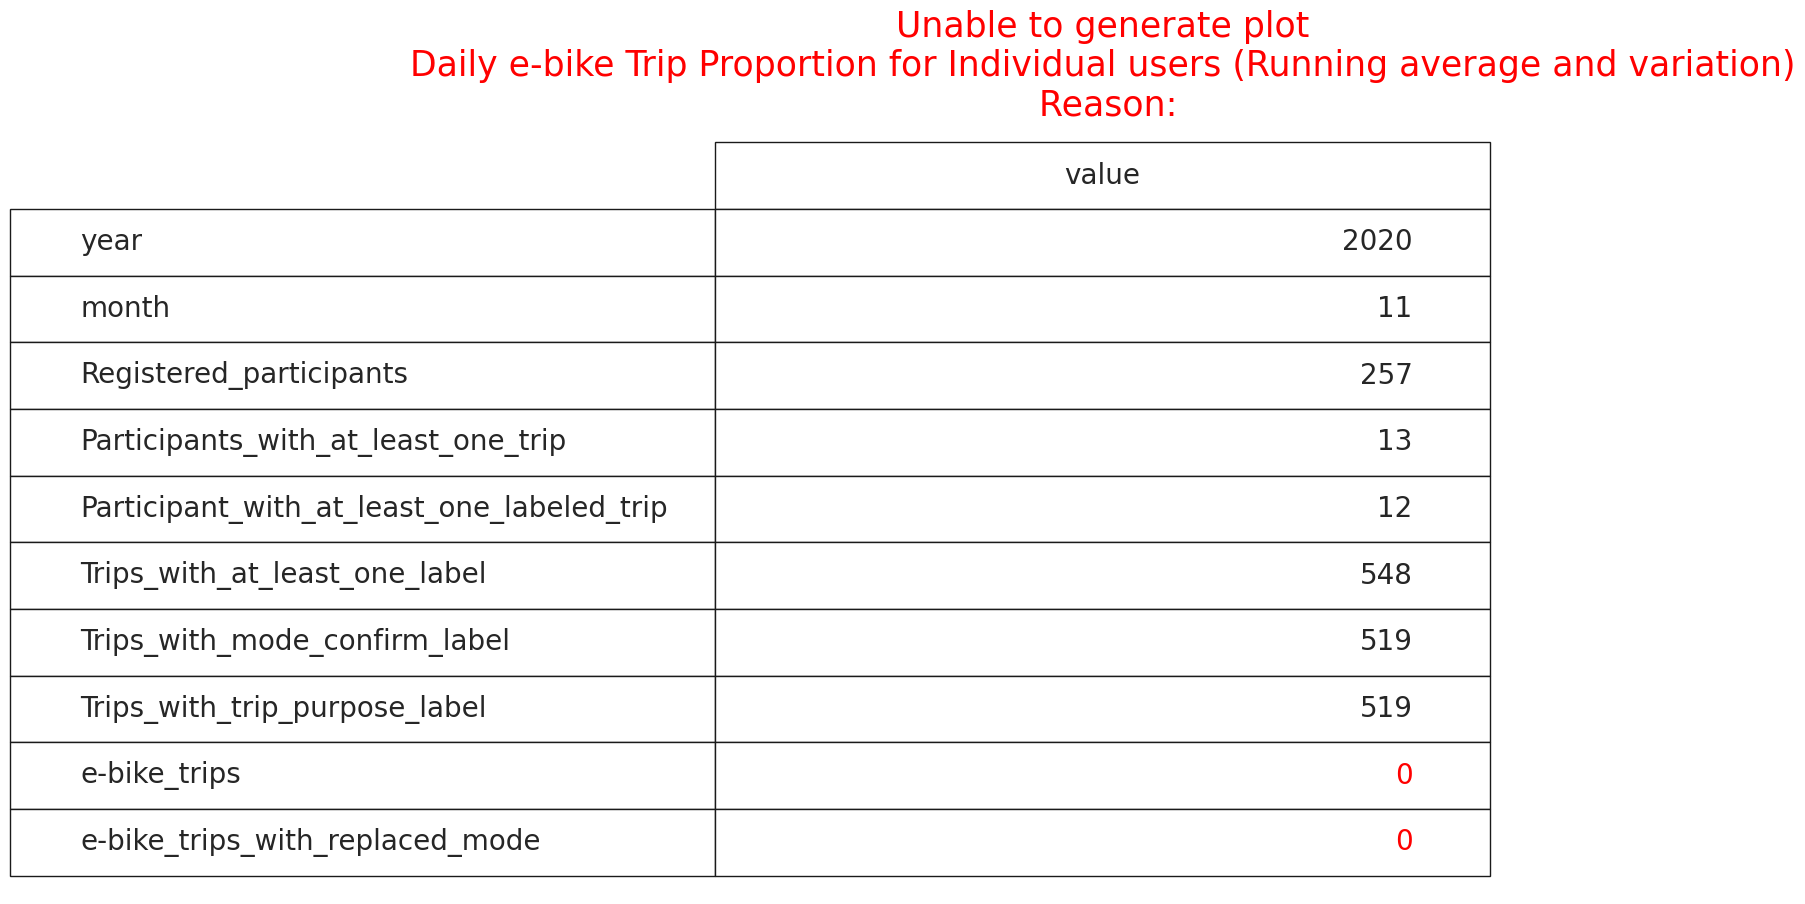

In [15]:
# Plots the number of trips per user with error bars
# from the seaborn documentation:
# By default, the plot aggregates over multiple y values at each value of x and 
# shows an estimate of the central tendency and a confidence interval for that estimate.
# In our case, we have multiple trip proportions (one per user) for each day
# so the band represents the variation of the number of trips and the thick line represents the mean/median (unsure which)
# but this still doesn't tell us which users have dropped their ridership

plot_title_no_quality = f'Daily {mode_of_interest} Trip Proportion for Individual users (Running average and variation)'
file_name = f"ts_{mode_of_interest}_trip_individual_variation%s"%file_suffix

try:
    if len(mode_counts_interest) == 0:
        # force error generation so that we will go into the "missing" data code path
        raise RuntimeError(f"No {mode_of_interest} trips found")

    plot_data_mode = mode_counts_interest.groupby(['date_time', 'user_id'], as_index=False)["trip_count_smooth"].sum()
    plot_data = mode_counts.groupby(['date_time','user_id'], as_index=False)['trip_count_smooth'].sum()
    plot_data = plot_data.merge(plot_data_mode, on=['date_time', 'user_id'])
    plot_data['mode_trip_proportion'] = plot_data['trip_count_smooth_y'] / plot_data['trip_count_smooth_x']

    plot_title= plot_title_no_quality+"\n"+quality_text
    ylab = 'Proportion of Daily Trips'

    timeseries_plot(plot_data['date_time'], plot_data['mode_trip_proportion'], plot_title, ylab, file_name)
    alt_text = store_alt_text_timeseries(plot_data.drop(columns=['user_id','trip_count_smooth_x','trip_count_smooth_y']), file_name, plot_title)
except:
    generate_missing_plot(plot_title_no_quality,debug_df,file_name)
    alt_text = store_alt_text_missing(debug_df, file_name, plot_title_no_quality)

### Daily mileage proportion for mode of interest with error bounds

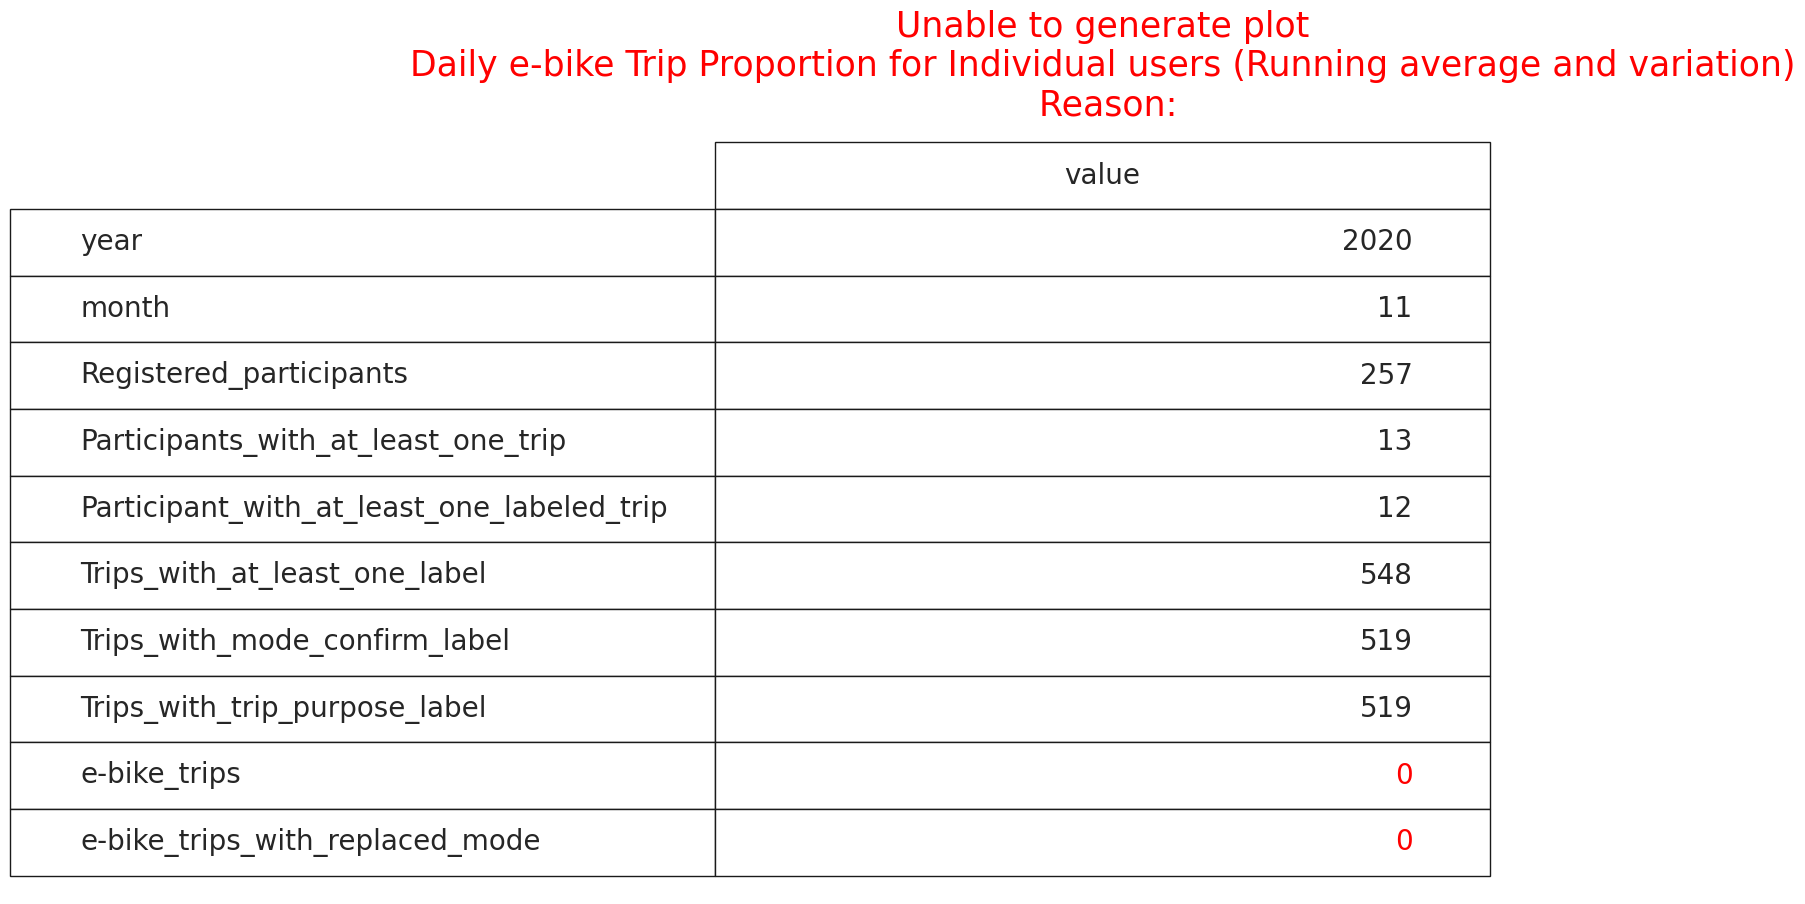

In [16]:
# Plots the number of trips per user with error bars
# from the seaborn documentation:
# By default, the plot aggregates over multiple y values at each value of x and 
# shows an estimate of the central tendency and a confidence interval for that estimate.
# In our case, we have multiple trip proportions (one per user) for each day
# so the band represents the variation of the number of trips and the thick line represents the mean/median (unsure which)
# but this still doesn't tell us which users have dropped their ridership

plot_title = f'Daily {mode_of_interest} Mileage Proportion for Individual users (Running average and variation)'
file_name = f"ts_{mode_of_interest}_mile_individual_variation%s"%file_suffix

try:
    if len(mode_distance_interest) == 0:
        # force error generation so that we will go into the "missing" data code path
        raise RuntimeError(f"No {mode_of_interest} trips found")

    plot_data_mode = mode_distance_interest.groupby(['date_time', 'user_id'], as_index=False)["distance_miles_smooth"].sum()
    plot_data = mode_distance.groupby(['date_time','user_id'], as_index=False)['distance_miles_smooth'].sum()
    plot_data = plot_data.merge(plot_data_mode, on=['date_time', 'user_id'])
    plot_data['mode_miles_proportion'] = plot_data['distance_miles_smooth_y'] / plot_data['distance_miles_smooth_x']

    plot_title= plot_title_no_quality+"\n"+quality_text
    ylab = 'Proportion of Daily Miles'

    timeseries_plot(plot_data['date_time'], plot_data['mode_miles_proportion'], plot_title, ylab, file_name)
    alt_text = store_alt_text_timeseries(plot_data.drop(columns=['user_id','distance_miles_smooth_x','distance_miles_smooth_y']), file_name, plot_title)
except:
    generate_missing_plot(plot_title_no_quality,debug_df,file_name)
    alt_text = store_alt_text_missing(debug_df, file_name, plot_title_no_quality)